In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import P7_DataBreed
oP7_DataBreed=P7_DataBreed.P7_DataBreed()
oP7_DataBreed.load()
oP7_DataBreed.resize()
oP7_DataBreed.show()


Path to data directory ........ : ./data/Images
Number of breeds .............. : 120
Total number of images ........ : 20580
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 0


In [23]:
breed_count=2
image_per_breed_count=100
oP7_DataBreed.sampling(breed_count, image_per_breed_count)

oP7_DataBreed.build_sift_desc()
oP7_DataBreed.show()

Path to data directory ........ : ./data/Images
Number of breeds .............. : 120
Total number of images ........ : 20580
Standard images size .......... : (500, 375)
SIFT Descriptors count ........ : 200


In [25]:
import numpy as np
list(oP7_DataBreed._dict_breed_kpdesc.values())[20][0].shape

(1518, 128)

In [26]:
X_train = np.zeros(128)
y_train = list()
#X_train = X_train.reshape(128)
for id, (desc,breedname) in oP7_DataBreed._dict_breed_kpdesc.items():
    X_train = np.vstack((X_train,desc))
    for k in range(0,desc.shape[0]):
        y_train.append(breedname)
    #print([desc.shape for kp, desc in list_kpdesc])
    
print(X_train.shape)
y_train = np.array(y_train)
X_train = X_train[1:,:].copy()    
print(X_train.shape, y_train.shape)

(404518, 128)
(404517, 128) (404517,)


#### Cross-validation of GMM hyper-parameter : covariance type.

In [36]:
import pandas as pd
df_desc = pd.DataFrame(X_train)

In [39]:
import p5_util

cluster_start = 1
cluster_end = 5
dict_hyper_parameter={'covariance_type':['diag','spherical','full']}
t_range_cluster = (cluster_start, cluster_end)
dict_list_gmm_model = p5_util.gmm_hyper_parameter_cv(df_desc, t_range_cluster ,dict_hyper_parameter)

Clustering from clusters range from : 1 --> 5
GMM Hyper-parameter type= covariance_type
Hyper parameter value : diag
Hyper parameter value : spherical
Hyper parameter value : full


#### Display AIC and BIC considering clusters number

<Figure size 1008x504 with 0 Axes>

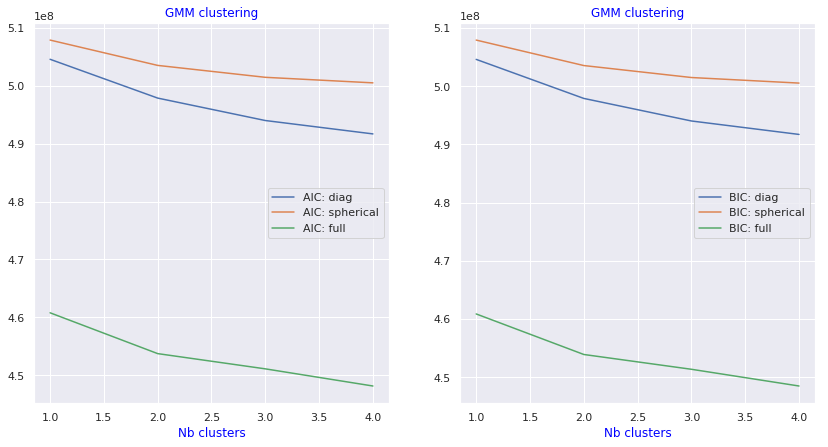

In [42]:
import p5_util_plot
p_figsize = (14,7)
t_range_cluster = (cluster_start, cluster_end)
p_title = 'GMM clustering'
p5_util_plot.gmm_models_plot_AIC_BIC(df_desc, dict_list_gmm_model, t_range_cluster, p_figsize, p_title)

<font color='red'>Loss of information is optimized for clusters number = 2</font>

#### GMM models evaluation:  computation of silhouette score

In [43]:
import p5_util
dict_dict_silhouette_score = p5_util.gmm_silhouette_compute(df_desc, dict_list_gmm_model)

GMM Silhouette score: Hyper-parameter=diag
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4

GMM Silhouette score: Hyper-parameter=spherical
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4

GMM Silhouette score: Hyper-parameter=full
GMM Silhouette score: Cluster= 2
GMM Silhouette score: Cluster= 3
GMM Silhouette score: Cluster= 4



In [45]:
import p5_util
filename = './data/df_desc_2breeds.dump'
p5_util.object_dump(df_desc,filename)

In [44]:
import p5_util
filename = './data/dict_dict_silhouette_score_gmm_2breeds.dump'
p5_util.object_dump(dict_dict_silhouette_score,filename)

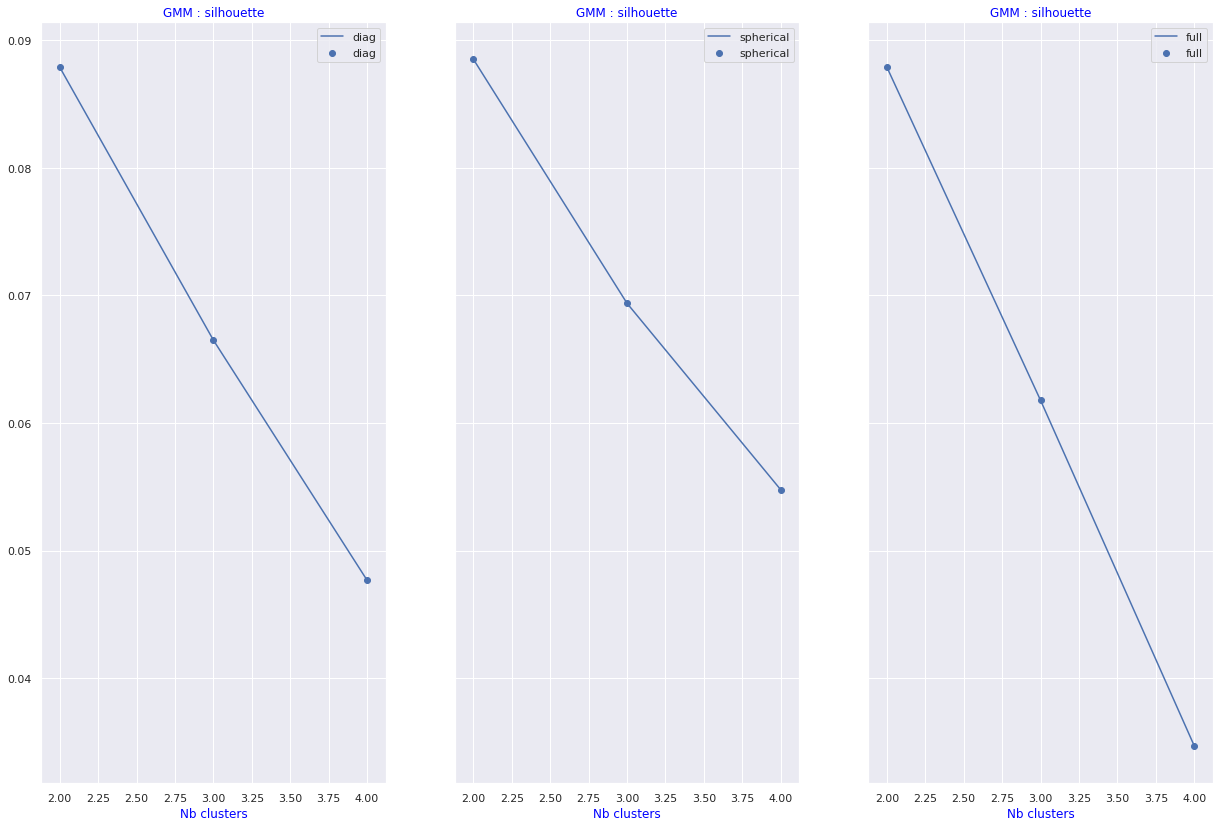

In [46]:
import p5_util_plot
p_figsize=(21,14)
areas_raws =1
areas_colums =3
p_title = "GMM : silhouette"
p5_util_plot.gmm_models_plot_silhouette(df_desc, dict_dict_silhouette_score\
, p_figsize, p_title, areas_raws, areas_colums)